# 🧠 Credit Card Fraud Detection — A Data Preprocessing Case Study

Fraud detection is one of the most critical applications of data science.  
However, the success of any model depends less on the model itself and more on **how well the data is preprocessed**.

In this notebook, we’ll focus on **data preprocessing** as the foundation for building a credit card fraud detection system.  
We’ll see how each step — from cleaning to balancing — impacts model performance.


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models (for later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

# Display first few rows
df.head()


Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Initial Data Exploration

In [ ]:
# Basic info
df.info()

# Dataset shape
print(f"Dataset shape: {df.shape}")

# Check for null values
df.isnull().sum()

# Quick statistics
df.describe()


## 🔍 Initial Observations

- The dataset contains transactions labeled as `0` (non-fraud) and `1` (fraud).
- Each feature (`V1` to `V28`) is a result of PCA transformation to protect customer identity.
- The `Amount` and `Time` columns are not transformed.
- There are **no missing values**, but the dataset is **highly imbalanced**, which is a key challenge.


Handling Duplicates & Class Imbalance

Duplicate rows: 1081
After removing duplicates: (283726, 31)


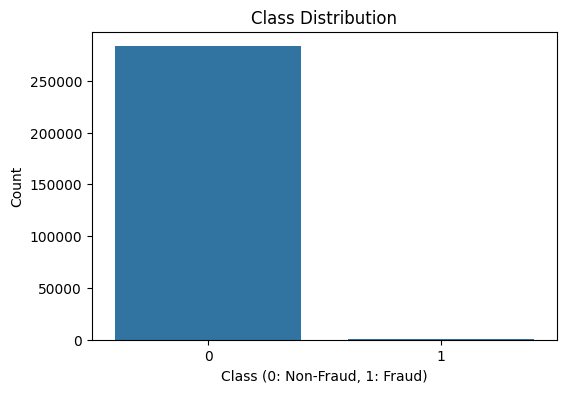

In [3]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")

# Class distribution
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()


Data Balancing (Using SMOTE or Undersampling)

In [4]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Class
0    283253
1       473
Name: count, dtype: int64
After SMOTE: Class
0    283253
1    283253
Name: count, dtype: int64


## ⚖️ Balancing the Dataset

The dataset originally had **very few fraud transactions**.  
To prevent the model from being biased towards non-fraud cases, we apply **SMOTE (Synthetic Minority Oversampling Technique)**,  
which creates synthetic samples of the minority class to balance the dataset.


Feature Scaling

In [5]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Convert back to DataFrame
X_res_scaled = pd.DataFrame(X_res_scaled, columns=X.columns)
X_res_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.806108,0.179237,-0.536924,1.014115,-0.290885,0.292444,0.746899,0.548887,-0.112072,0.762142,...,0.046223,-0.139914,0.261758,-0.075044,0.224794,0.168416,-0.491728,0.030862,-0.158928,0.238968
1,-1.806108,0.667737,-0.438361,0.612881,-0.589591,0.391886,0.408963,0.489011,-0.115592,0.477703,...,-0.279538,-0.256846,-0.755557,0.151921,-0.529151,0.231049,0.222320,-0.139147,-0.070450,-0.424565
2,-1.806087,0.179515,-0.905486,0.884911,-0.611552,0.251284,1.577000,0.652666,-0.073499,-0.100732,...,0.324284,0.010179,0.809916,1.018063,-1.176817,-0.571196,-0.378349,-0.194452,-0.254632,1.273308
3,-1.806087,0.254577,-0.569624,0.888261,-1.010812,0.374329,1.233761,0.548513,-0.039901,-0.042104,...,-0.420775,-0.190635,-0.040785,-0.160623,-2.078150,1.009612,-0.566109,-0.053624,0.045124,0.121010
4,-1.806067,0.217827,-0.260508,0.846903,-0.604083,0.275250,0.519561,0.615334,-0.207673,0.970667,...,0.205934,-0.134911,0.839441,-0.103965,0.362579,-0.373992,1.075519,0.133271,0.425219,-0.120640


Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (453204, 30)
Test shape: (113302, 30)


Model Training (Logistic Regression Example)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56651
           1       0.99      0.97      0.98     56651

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302

ROC-AUC Score: 0.9971587233105496


Precision-Recall & ROC Curves

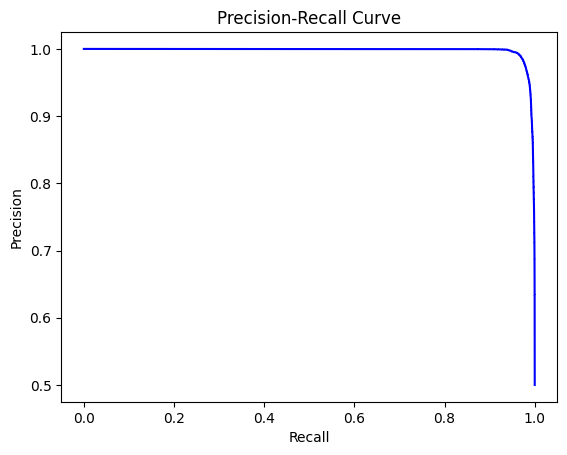

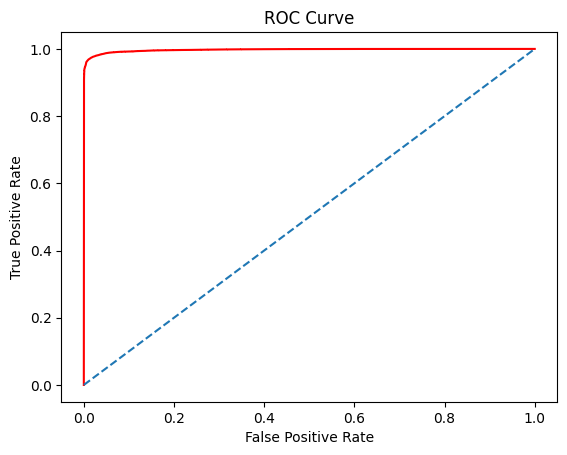

In [11]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='blue')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='red')
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


## 🧩 Conclusion

Through this project, we explored how crucial **data preprocessing** is for fraud detection.

- We handled duplicates and checked for missing values.  
- Balanced the dataset using SMOTE.  
- Scaled features for better model convergence.  
- Evaluated model performance using Precision-Recall and ROC curves.

Even though our focus was not on achieving the highest accuracy,  
we observed how good preprocessing directly improves model performance and interpretability.
